JIANG Jinchen 1701110212

**2 a)The 20 brightest stars:** (The data is from simbad)

| star name | m_V | B-V | parallax |
|:--------- | :--: | :-: | :--------:|
|Sun|-26.74|0.66*|-|
|alf CMa|-1.46|0.00|379.21|
|alf Car|-0.74|0.15|10.55|
|alf Boo|-0.05|1.23|88.83|
|alf Cen A|0.01|0.71|754.81|
|alf Lyr|0.03|0.00|130.23|
|alf Aur|0.08|0.80|76.20|
|bet Ori|0.13|-0.03|3.78|
|alf CMi|0.37|0.42|284.56|
|alf Ori|0.42|1.85|6.55|
|alf Eri|0.46|-0.16|23.39|
|bet Cen|0.60|-0.22|8.23|
|alf Aql|0.76|0.22|194.95|
|alf Cru|0.81|-0.25|10.13|
|alf Tau|0.86|1.54|48.94|
|alf Sco|0.91|1.84|5.89|
|alf Vir|0.97|-0.23|13.06|
|bet Gem|1.14|1.00|96.54|
|alf PsA|1.16|0.09|129.81|
|alf Cyg|1.25|0.09|2.31|

\* The color index is from Gray (1992).

**Color-Magnitude diagram**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import random as rd

In [3]:
name = ['sun','alf CMa','alf Car','alf Boo','alf Cen','alf Lyr','alf Aur','bet Ori','alf CMi','alf Ori','alf Eri','bet Cen','alf Aql','alf Cru','alf Tau','alf Sco','alf Vir','bet Gem','alf PsA','alf Cyg']
m_V = [-26.74, -1.46, -0.74, -0.05, 0.01, 
        0.03, 0.08, 0.13, 0.37, 0.42, 
        0.46, 0.60, 0.76, 0.81, 0.86, 
        0.91, 0.97, 1.14, 1.16, 1.25]
color = [0.66, 0.00, 0.15, 1.23, 0.71, 
          0.00, 0.80, -0.03, 0.42, 1.85, 
          -0.16, -0.22, 0.22, -0.25, 1.54, 
          1.84, -0.23, 1.00, 0.09, 0.09]
parallax = [2.0626e8, 379.21, 10.55, 88.83, 754.81, 
           13.023, 76.20, 3.78, 284.56, 6.55, 
           23.39, 8.23, 194.95, 10.13, 48.94, 
           5.89, 13.06, 96.54, 129.81, 2.31]
d =  1000 / np.array(parallax)#distance in pc
M_V = m_V - 5 * np.log10(d / 10)

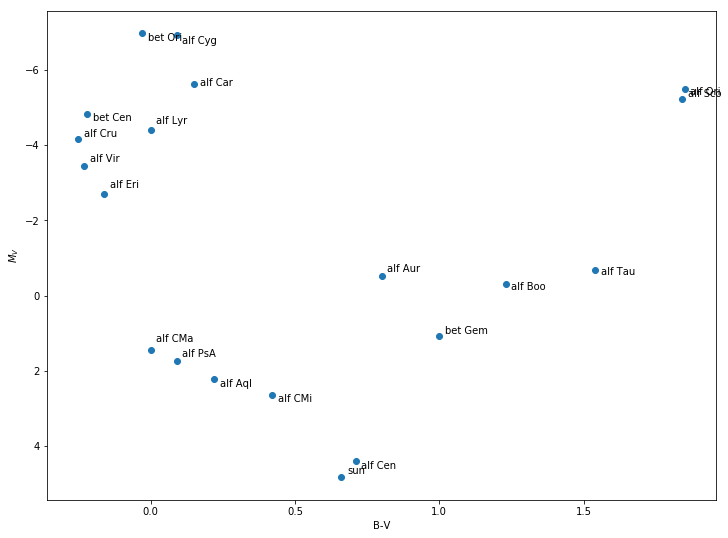

In [4]:
plt.figure(figsize=(12,9))
plt.gca().invert_yaxis()
plt.scatter(color, M_V, color='C0')
for i in range(len(name)):
    plt.annotate(name[i], xy=(color[i]+0.02,M_V[i]+(rd.random()-0.5)/2))
plt.xlabel('B-V')
plt.ylabel('$M_V$')
plt.show()

**Overplot evolution tracks** The stellar evolution tracks are from http://pleiadi.pd.astro.it/database_99/z019.tar.gz. It is more convenient to overplot it on HR diagram, since the features given in the evolution track are luminosity and temperature.

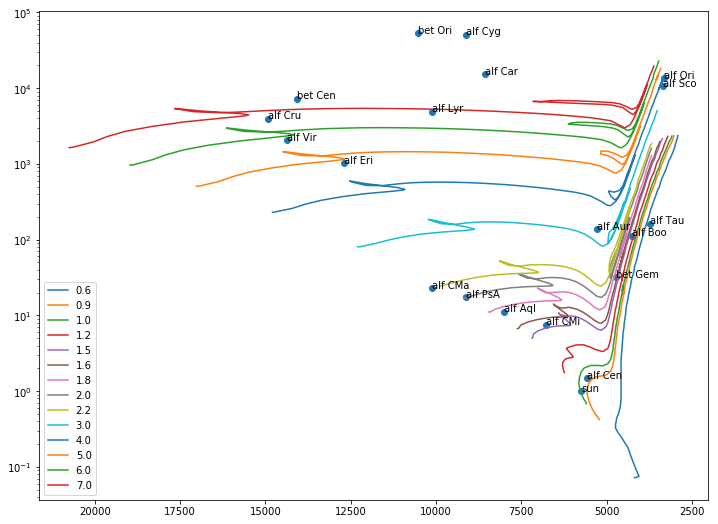

In [11]:
mass = [0.6, 0.9, 1.0, 1.2, 1.5, 1.6, 1.8, 2.0, 2.2, 3.0, 4.0, 5.0, 6.0, 7.0] #stellar mass

color = np.array(color)
M_V = np.array(M_V)
L_m = 10**(-0.4 * (M_V - 4.83))
T_m = 4600 * (1 / (0.92 * color + 1.7) + 1 / (0.92 * color + 0.62))
plt.figure(figsize=(12,9))
plt.gca().set_yscale('log')
plt.gca().invert_xaxis()
plt.scatter(T_m, L_m)
for i in range(len(name)):
    plt.annotate(name[i], xy=(T_m[i],L_m[i]))
for m in mass:
    p = str(int(m * 100))
    if len(p) is 2:
        p = '0' + p
    filename = 'z019/ms' + p + 'z019.dat' #name of stellar evolution track file
    logL, logT = np.loadtxt(filename, dtype=float, unpack=True, usecols=(1,2), skiprows=1) #luminosity and effective temperature
    plt.plot(10**logT, 10**logL, label=str(m))
plt.legend()
plt.show()

**Mass and evolutionary stage** 

| star name | mass(solar mass) | stage |
|:--------- | :--: | :-: |
|Sun|1.0|MS|
|alf CMa|2.2|MS|
|alf Car|>7|HB/subgiant|
|alf Boo|1.2|RGB|
|alf Cen A|0.9|MS|
|alf Lyr|7.0|subgiant|
|alf Aur|3.0|RGB/HB|
|bet Ori|>7|HB/subgiant|
|alf CMi|1.5|MS|
|alf Ori|4.0|red supergiant|
|alf Eri|5.0|MS/subgiant|
|bet Cen|7.0|subgiant|
|alf Aql|1.8|MS|
|alf Cru|7.0|subgiant|
|alf Tau|0.6|RGB|
|alf Sco|4.0|red supergiant|
|alf Vir|6.0|MS/subsiant|
|bet Gem|1.6|RGB|
|alf PsA|2.0|MS|
|alf Cyg|>7|HB/subgiant|

**b)** 30%-40% of the 20 brightest stars are on the main sequence, 60%-70% are in the post-main sequence. For a star like sun, it should spend 9 billion years on the MS, and 3 billion yesars in the post-main sequence according to Table 10.1 of the textbook. Therefore the ratio in the 20 brightest stars is inconsistent with the ratio of the lifetime of two phases. This is possibly caussed by selective effect: the giant stars are brighter than when it was in the main sequence.